## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Chapter 1: Business Overview


1.1   Introduction


The real estate market is a complex and dynamic environment where accurately pricing houses is of paramount importance. In this ever-changing landscape, homeowners, buyers, and real estate agencies are often faced with the challenge of determining the fair market value of a property. The consequences of inaccurate pricing can be significant, ranging from houses languishing on the market for extended periods to missed opportunities for maximizing profit.
The quest for a precise and data-driven solution to this challenge has led us to explore a predictive model using linear regression. By leveraging the power of data analysis and predictive modeling, we aim to provide a practical tool that can revolutionize the way houses are priced, making the process more transparent, efficient, and informed.


1.2   Challenges


The challenges in the real estate market are multifaceted. Real estate agencies often grapple with two primary issues: overpricing and the lack of a robust decision framework. Overpricing can lead to properties remaining unsold for prolonged periods, incurring additional costs, and diminishing potential profits. On the other hand, prospective buyers face difficulties in determining which properties align with their budgets and desired features.


1.3    Problem Statement


The core problem that our project addresses is the accurate pricing of houses listed in the market. Overpricing can be detrimental to both sellers and buyers. The absence of a reliable decision framework means that clients with varying budgets and preferences lack guidance in their property search. As such, there is a clear need for a data-driven solution that can provide precise house price predictions and, in doing so, mitigate the challenges faced by stakeholders in the real estate market.


Objectives

Primary Objective: Develop a robust linear regression model to accurately predict house prices in King County, California, utilizing relevant variables from the dataset. Therefore our objectives are: 

a). Develop a regression model with the highest possible accuracy to predict and determine house prices based on their features.


b). Identify Key Factors Influencing House Prices in King County, California, to provide valuable insights for precise pricing strategies.


c). Analyze Model Performance using metrics such as mean squared error, R-squared values, and residual analysis to gauge the model's effectiveness.


d). Provide Actionable Recommendations to the Real Estate Agency for improving profitability and market presence, leveraging insights from the model.





### IMPORTING THE NECESSARY LIBRARIES AND LOADING THE DATASET

In [21]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions as fn
%matplotlib inline


In [22]:
df = pd.read_csv('data\kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


This is a brief overview of the dataset to confirm that is has loaded into a dataframe

### DATA UNDERSTANDING 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,...,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,...,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,...,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,...,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,...,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,...,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,...,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## DATA CLEANING

### HANDLING MISSING VALUES

We'll start with visualizing our data to see if it has any missing values

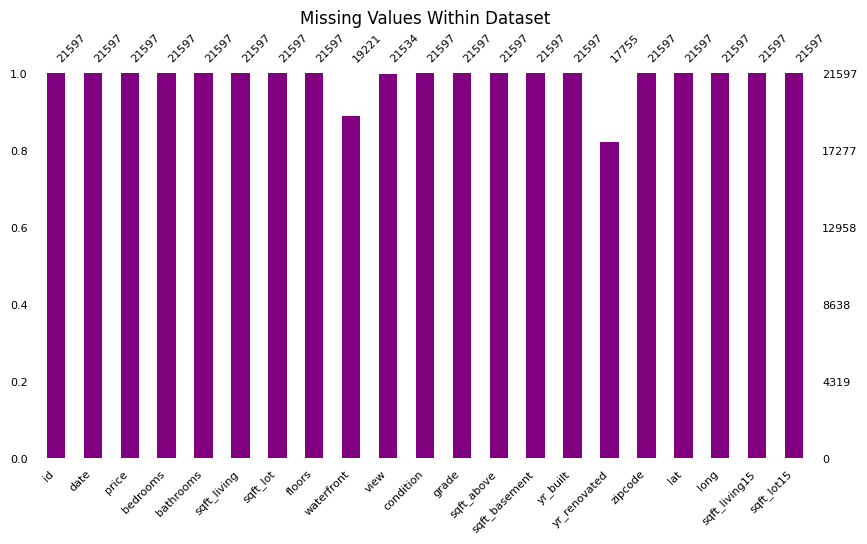

In [26]:
# Visualise the missing values in the dataset
import missingno as msno
msno.bar(df, color='purple', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset')
plt.show()

Lets find out how many each of the column has

In [27]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that the Waterfront, View (albeit few) and Yr_renovated have missing values

Since the Waterfront and View column has many missing values, we cannot drop all of them, we can group the 
values by their zipcodes and replace the values with the mode of each zipcode. It is reasonable 
to assume that all houses in the same zipcode have similar properties as far as waterfront and a view is 
concerned

In [28]:
# Group the DataFrame by 'zipcode' and calculate the mode for 'waterfront' within each group
mode_waterfront_by_zipcode = df.groupby('zipcode')['waterfront'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'waterfront' values based on the 'zipcode' mode
df['waterfront'] = df.apply(lambda row: mode_waterfront_by_zipcode[row['zipcode']] if pd.isna(row['waterfront']) else row['waterfront'], axis=1)


In [29]:
# Group the DataFrame by 'zipcode' and calculate the mode for 'view' within each group
mode_view_by_zipcode = df.groupby('zipcode')['view'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'view' values based on the 'zipcode' mode
df['view'] = df.apply(lambda row: mode_view_by_zipcode[row['zipcode']] if pd.isna(row['view']) else row['view'], axis=1)


Handle the missing values in the year renovated column

In [30]:
# Fill missing values in the 'yr_renovated' column with 0
df['yr_renovated'].fillna(0, inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Handling duplicates

In [32]:
df.duplicated().any()

False

We do not have any duplicated values

## Handling Outliers
In this section, i will only focus on numerical columns. I will also exclude the following columns [id, lat, long] because they do not affect the perfromace of the model

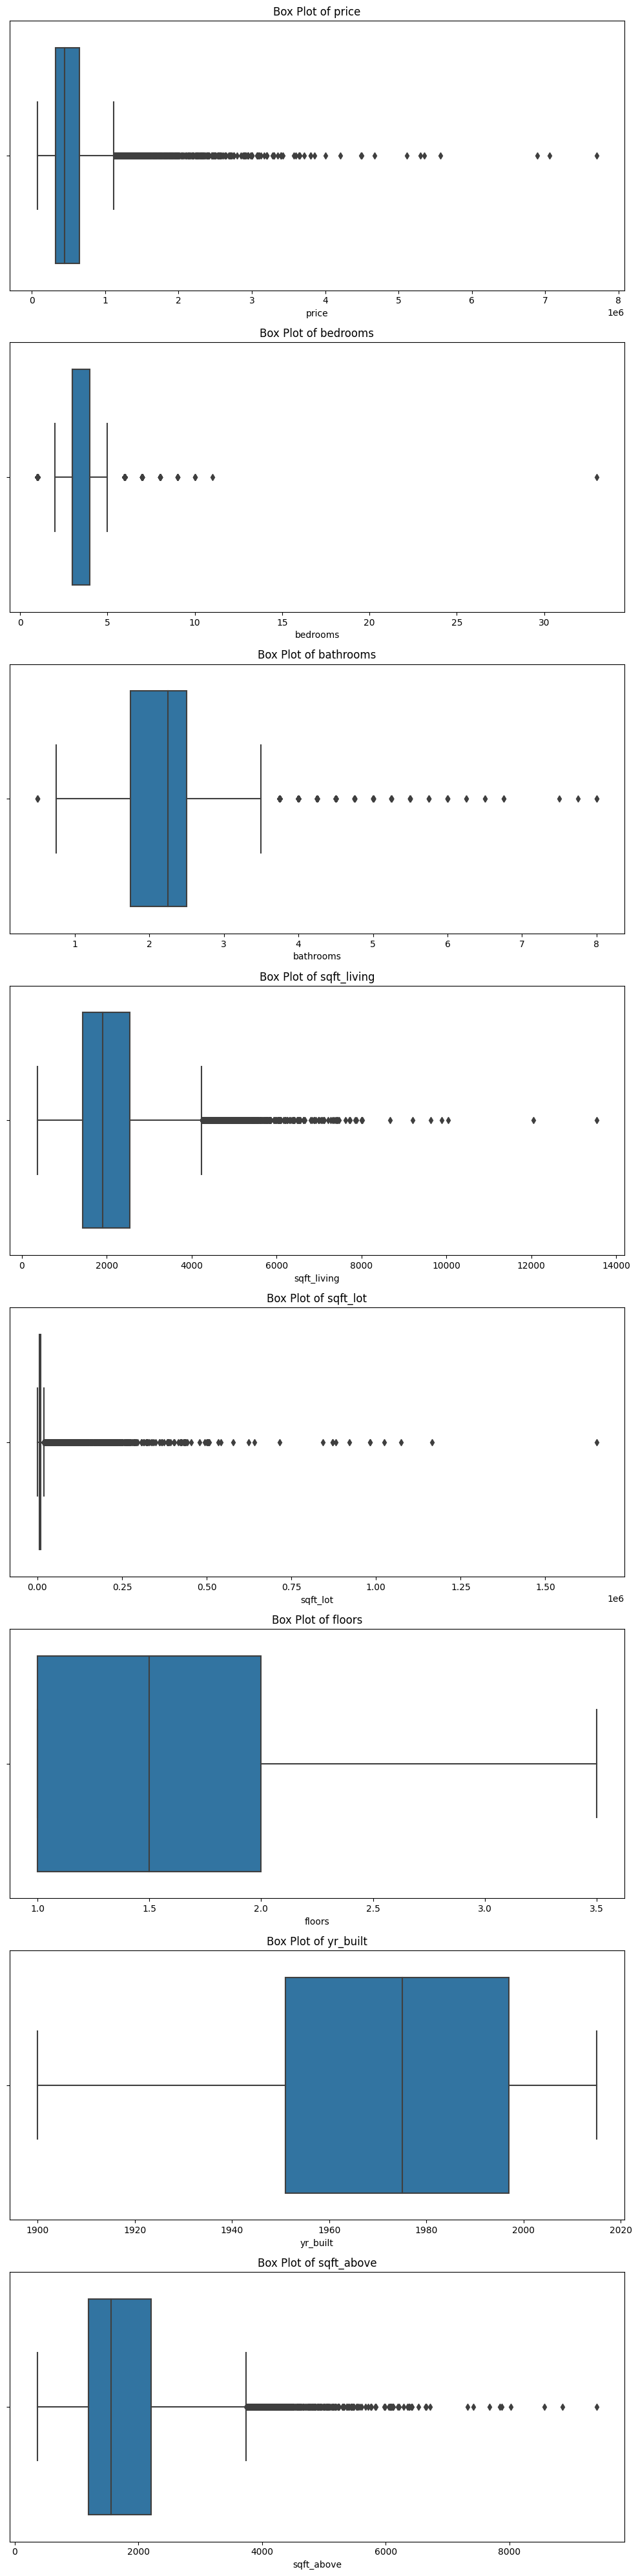

In [33]:


# Specify the columns to create box plots for
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'yr_built', 'sqft_above']

# Create a grid of subplots
num_cols = len(columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through the specified columns and create box plots
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


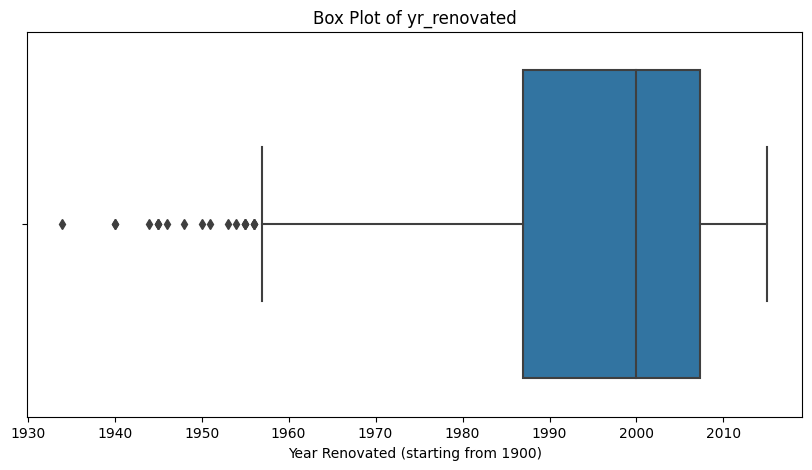

In [34]:

# Set the start year for 'yr_renovated' to 1900
df['yr_renovated'] = df['yr_renovated'] - (df['yr_built'].min() - 1900)

# Exclude houses with 0 values for 'yr_renovated'
df_filtered = df[df['yr_renovated'] > 0]

# Create a box plot for 'yr_renovated'
plt.figure(figsize=(10, 5))
sns.boxplot(x='yr_renovated', data=df_filtered, orient='h')
plt.title('Box Plot of yr_renovated')
plt.xlabel('Year Renovated (starting from 1900)')
plt.show()


## EXPLORATORY DATA ANALYSIS

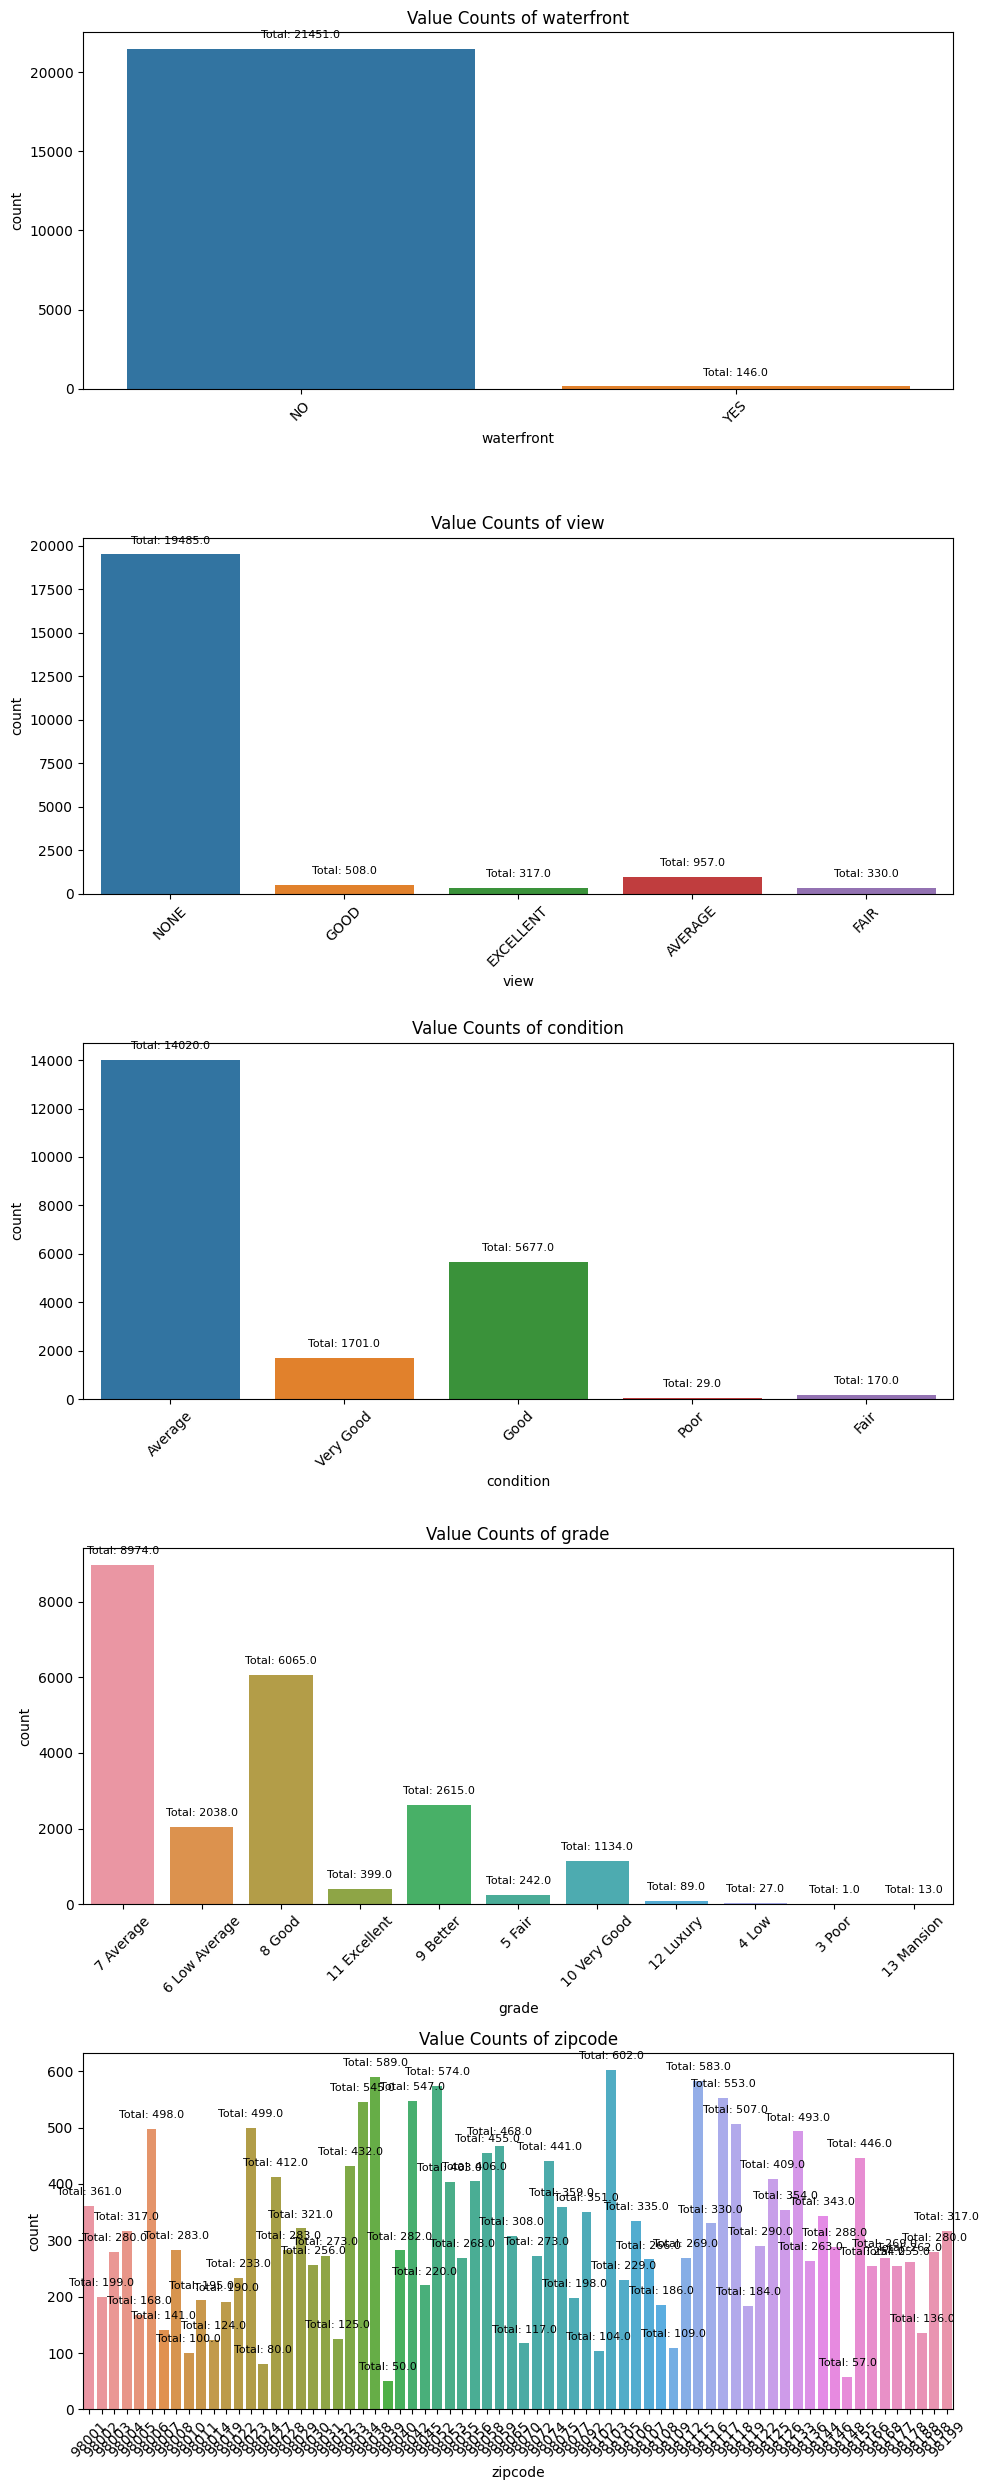

In [35]:
# Specify the categorical columns
categorical_columns = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

# Set up a grid of subplots
num_cols = len(categorical_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through the categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=df[column], ax=axes[i])
    ax.set_title(f'Value Counts of {column}')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)
    
    # Add labels displaying the total value counts for each bar
    for p in ax.patches:
        ax.annotate(f'Total: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


### NUmerical columns

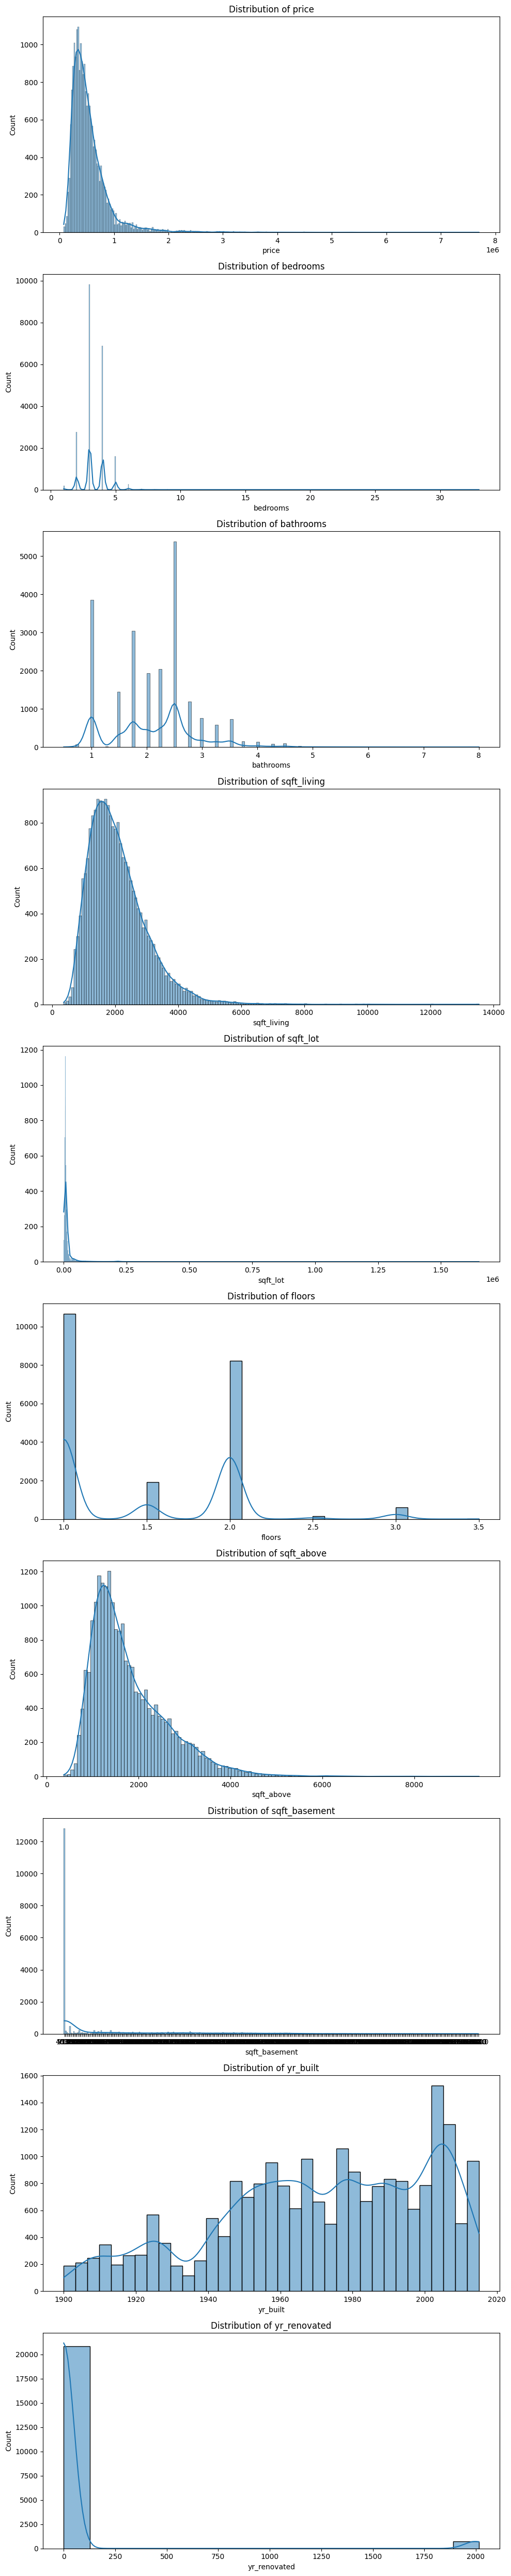

In [36]:
# Specify the columns excluding 'date'
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Set up a grid of subplots
num_cols = len(columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

# Loop through the specified columns
for i, column in enumerate(columns):
    # Plot: Distribution plot
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()



## DATA PREPARATION & Feature Engineering

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are a few columns here which we need to drop without engineering new features from them.They include, lat, long, sqft_living15, sqft_lot15. 

In [19]:
# new_df.corr()

In [38]:
# Assuming 'df' is your original DataFrame

# Create a new copy of the data while dropping the specified columns
new_df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1).copy()

# 'new_df' is a copy of the data without the specified columns


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
dtypes: float64(4), int64(7), object(6)
memory usage: 2

#### Add a new column to store the age of the houses 

In [41]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df['age'] = new_df['date'].dt.year - new_df['yr_built']
# new_df.age

### Removing null values in the 'yr_built" column and adding the 'renovated' column to show whether the house has been renovated or not

In [42]:
new_df.loc[new_df.yr_renovated.isnull(), 'yr_renovated'] = 0
new_df['renovated'] = new_df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
# new_df.renovated

#### Change the has_basement to a binary value

In [43]:
new_df['sqft_basement'] =new_df['sqft_basement'].replace('?', '0').astype('float')
new_df['has_basement'] =new_df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## FEATURE ENGINEERING 

### ORDINAL ENCODING 

##### Create a function that maps ordinal values into a dataframe with the corresponding numerical values based on a provided dictionary

In [45]:
def map_ordinal_values(df, col_name, value_dict):
    # map the ordinal values to numerical values using the provided dictionary
    df[col_name] = df[col_name].map(value_dict).astype(int)
    return df

In [46]:
df.view.value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [47]:
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}
view_dict = {'NONE':0, 'AVERAGE':1, 'GOOD': 2, 'FAIR':3, 'EXCELLENT':4}
new_df = map_ordinal_values(new_df, 'condition', condition_dict)
new_df = map_ordinal_values(new_df, 'grade', grade_dict)
new_df = map_ordinal_values(new_df, 'view', view_dict)

# print(new_df[['condition', 'grade', 'view']])

#### ONE HOT ENCODING 

#### One hot encoding will be done for he waterfront and the view column. To avoid the 'Dummy variable trap" we'll drop one of the created column

In [48]:
new_df.waterfront.nunique()

2

Create a function to do one-hot encoding on the specified column

In [49]:
def one_hot_encode(df, columns):
    if isinstance(columns, str):
        columns = [columns]  # Convert to a list if it's a string

    df = pd.get_dummies(df, columns=columns, prefix_sep='_', drop_first=True)
    return df

In [50]:
# columns_to_encode = ['waterfront', 'view']
# new_df = one_hot_encode(new_df, columns=['view'])
new_df = one_hot_encode(new_df, columns=['waterfront'])

In [51]:
new_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age,renovated,has_basement,waterfront_YES
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,0.0,98178,59,0,0,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,1991.0,98125,63,1,1,False
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,0.0,98028,82,0,0,False


In [52]:
# Select columns with dtype 'bool' and convert them to int
bool_columns = new_df.select_dtypes(include=['bool'])
new_df[bool_columns.columns] = bool_columns.astype(int)


In [53]:
new_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age,renovated,has_basement,waterfront_YES
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,0.0,98178,59,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,1991.0,98125,63,1,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,0.0,98028,82,0,0,0


In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   date            21597 non-null  datetime64[ns]
 2   price           21597 non-null  float64       
 3   bedrooms        21597 non-null  int64         
 4   bathrooms       21597 non-null  float64       
 5   sqft_living     21597 non-null  int64         
 6   sqft_lot        21597 non-null  int64         
 7   floors          21597 non-null  float64       
 8   view            21597 non-null  int32         
 9   condition       21597 non-null  int32         
 10  grade           21597 non-null  int32         
 11  sqft_above      21597 non-null  int64         
 12  sqft_basement   21597 non-null  float64       
 13  yr_built        21597 non-null  int64         
 14  yr_renovated    21597 non-null  float64       
 15  zi

### BI-VARIATE ANALYSIS

#### Scatter plot to show the relationship between price and the following column

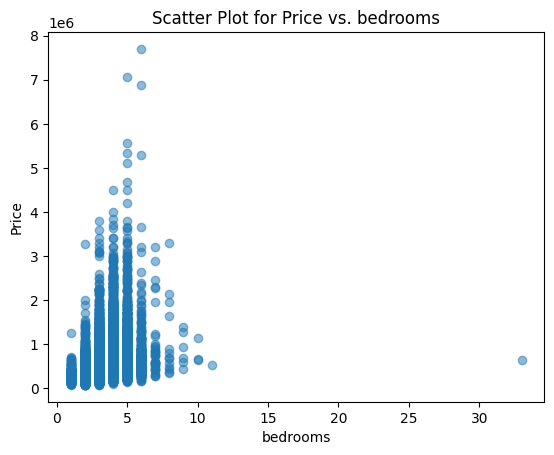

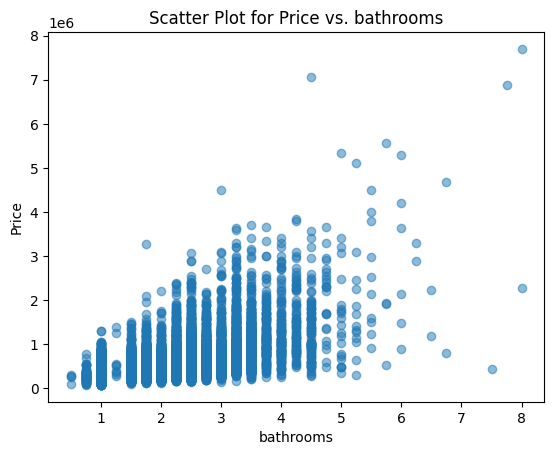

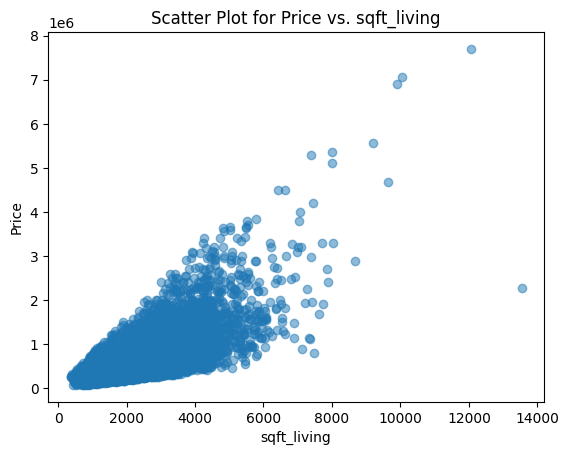

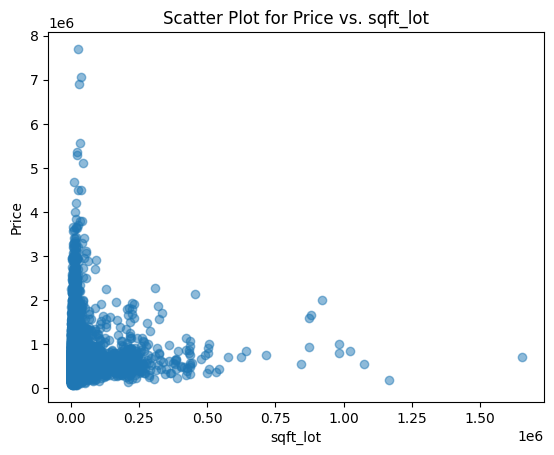

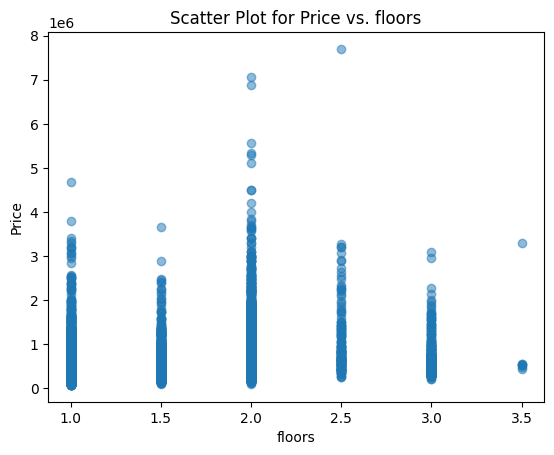

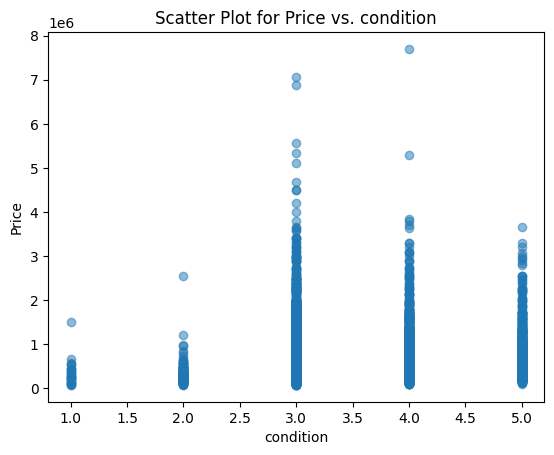

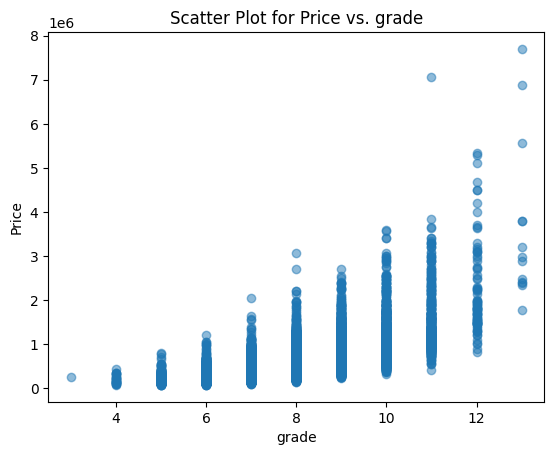

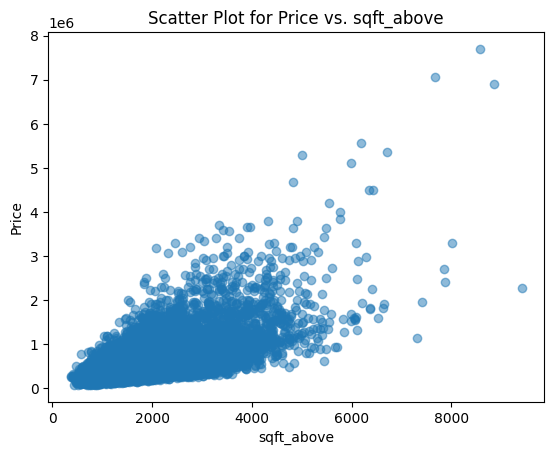

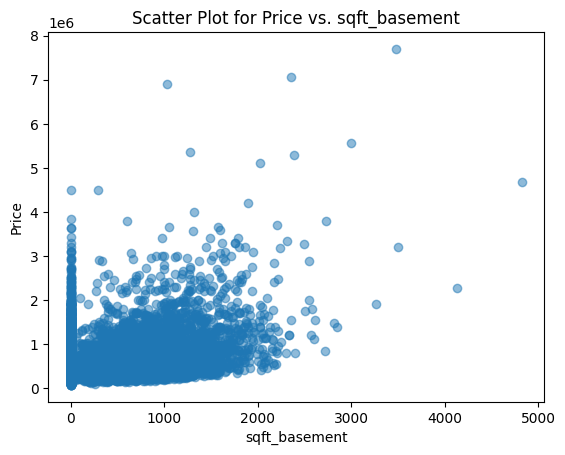

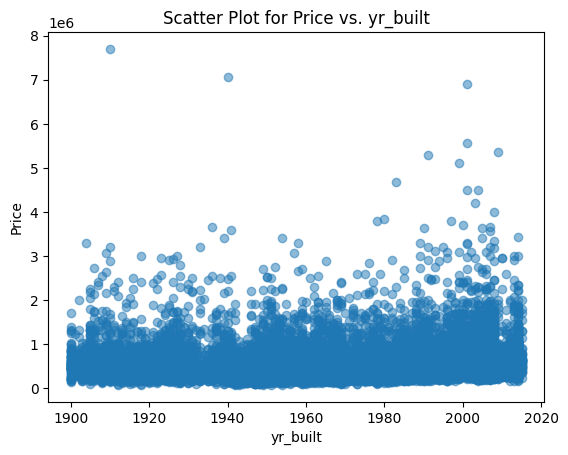

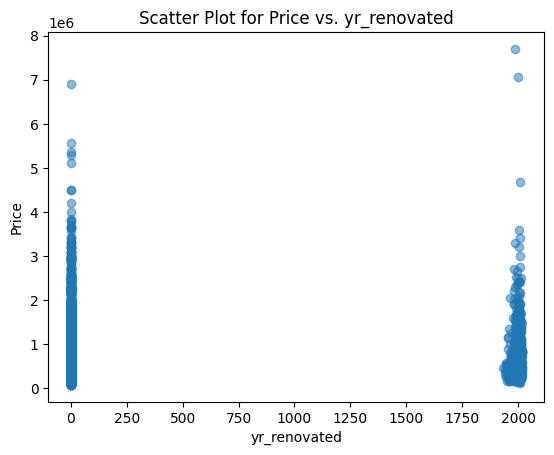

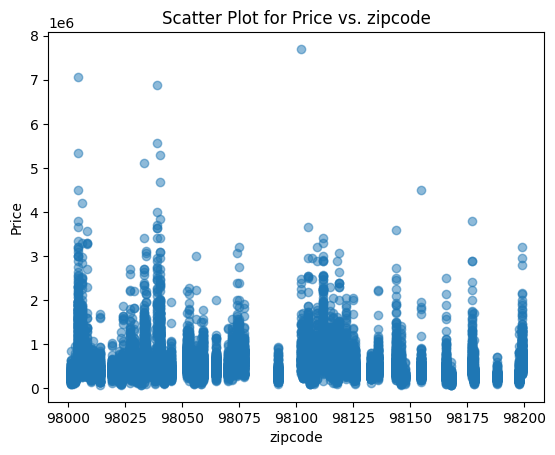

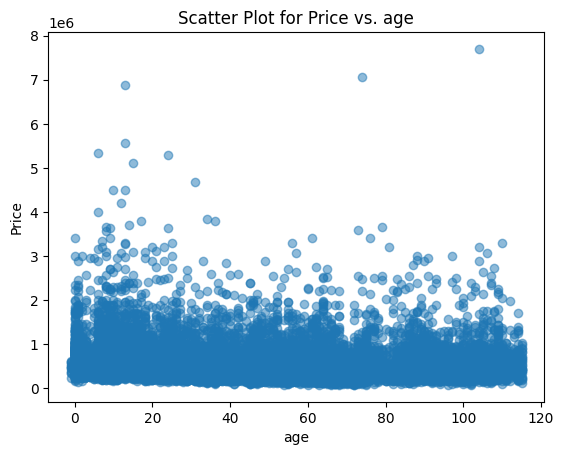

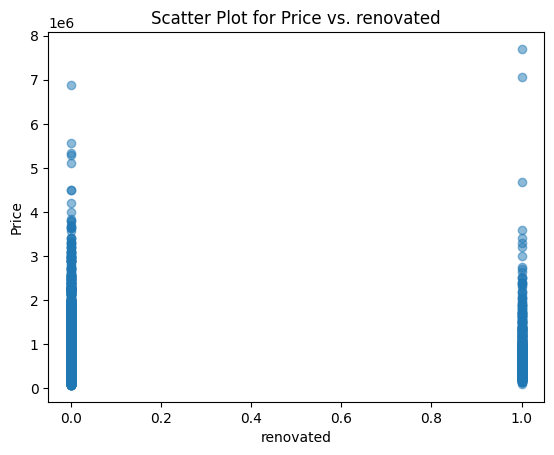

In [55]:
# Create a separate scatter plot for each of the specified columns

columns_to_plot = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
    'yr_renovated', 'zipcode', 'age', 'renovated'
]

for column in columns_to_plot:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(new_df[column], new_df['price'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot for Price vs. {column}')

plt.show()


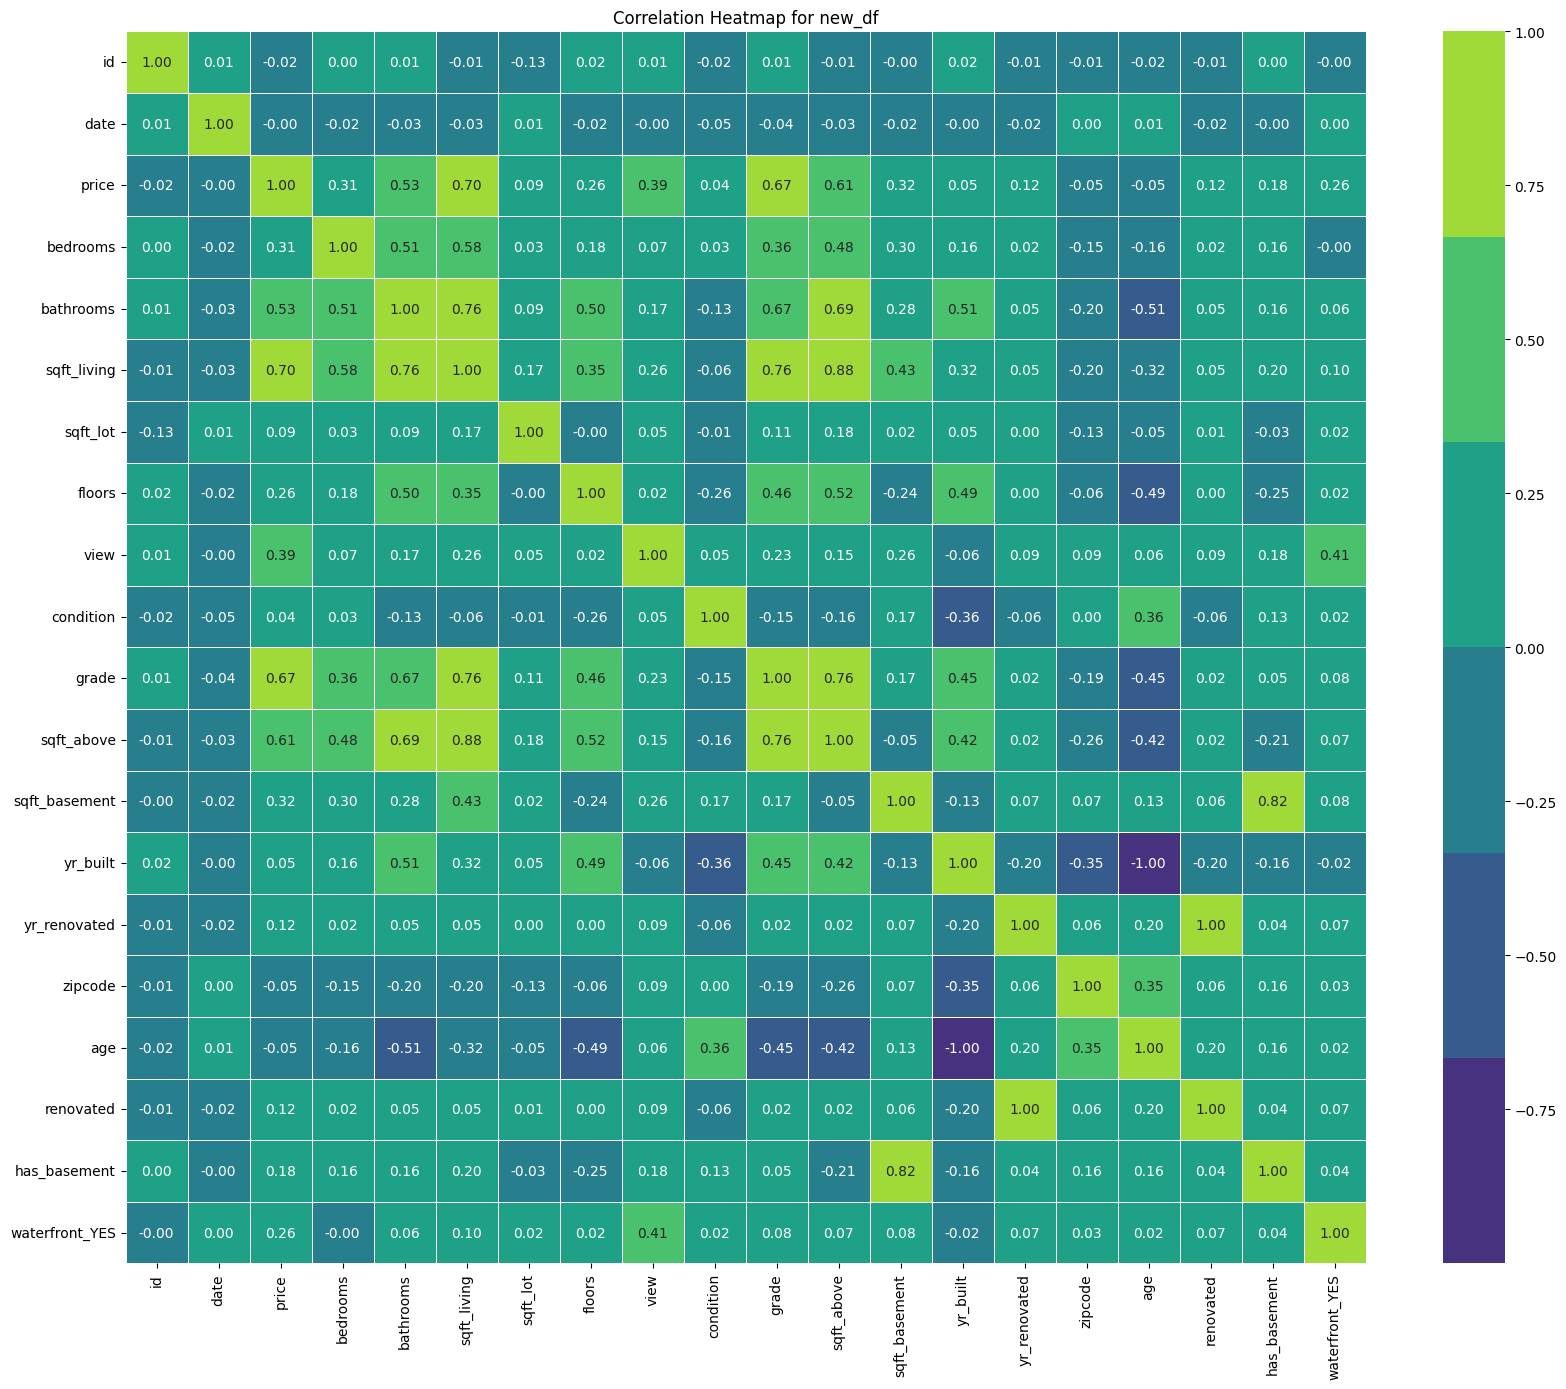

In [61]:
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set a color palette
cmap = sns.color_palette("viridis")

# Create the heatmap
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for new_df')

plt.show()

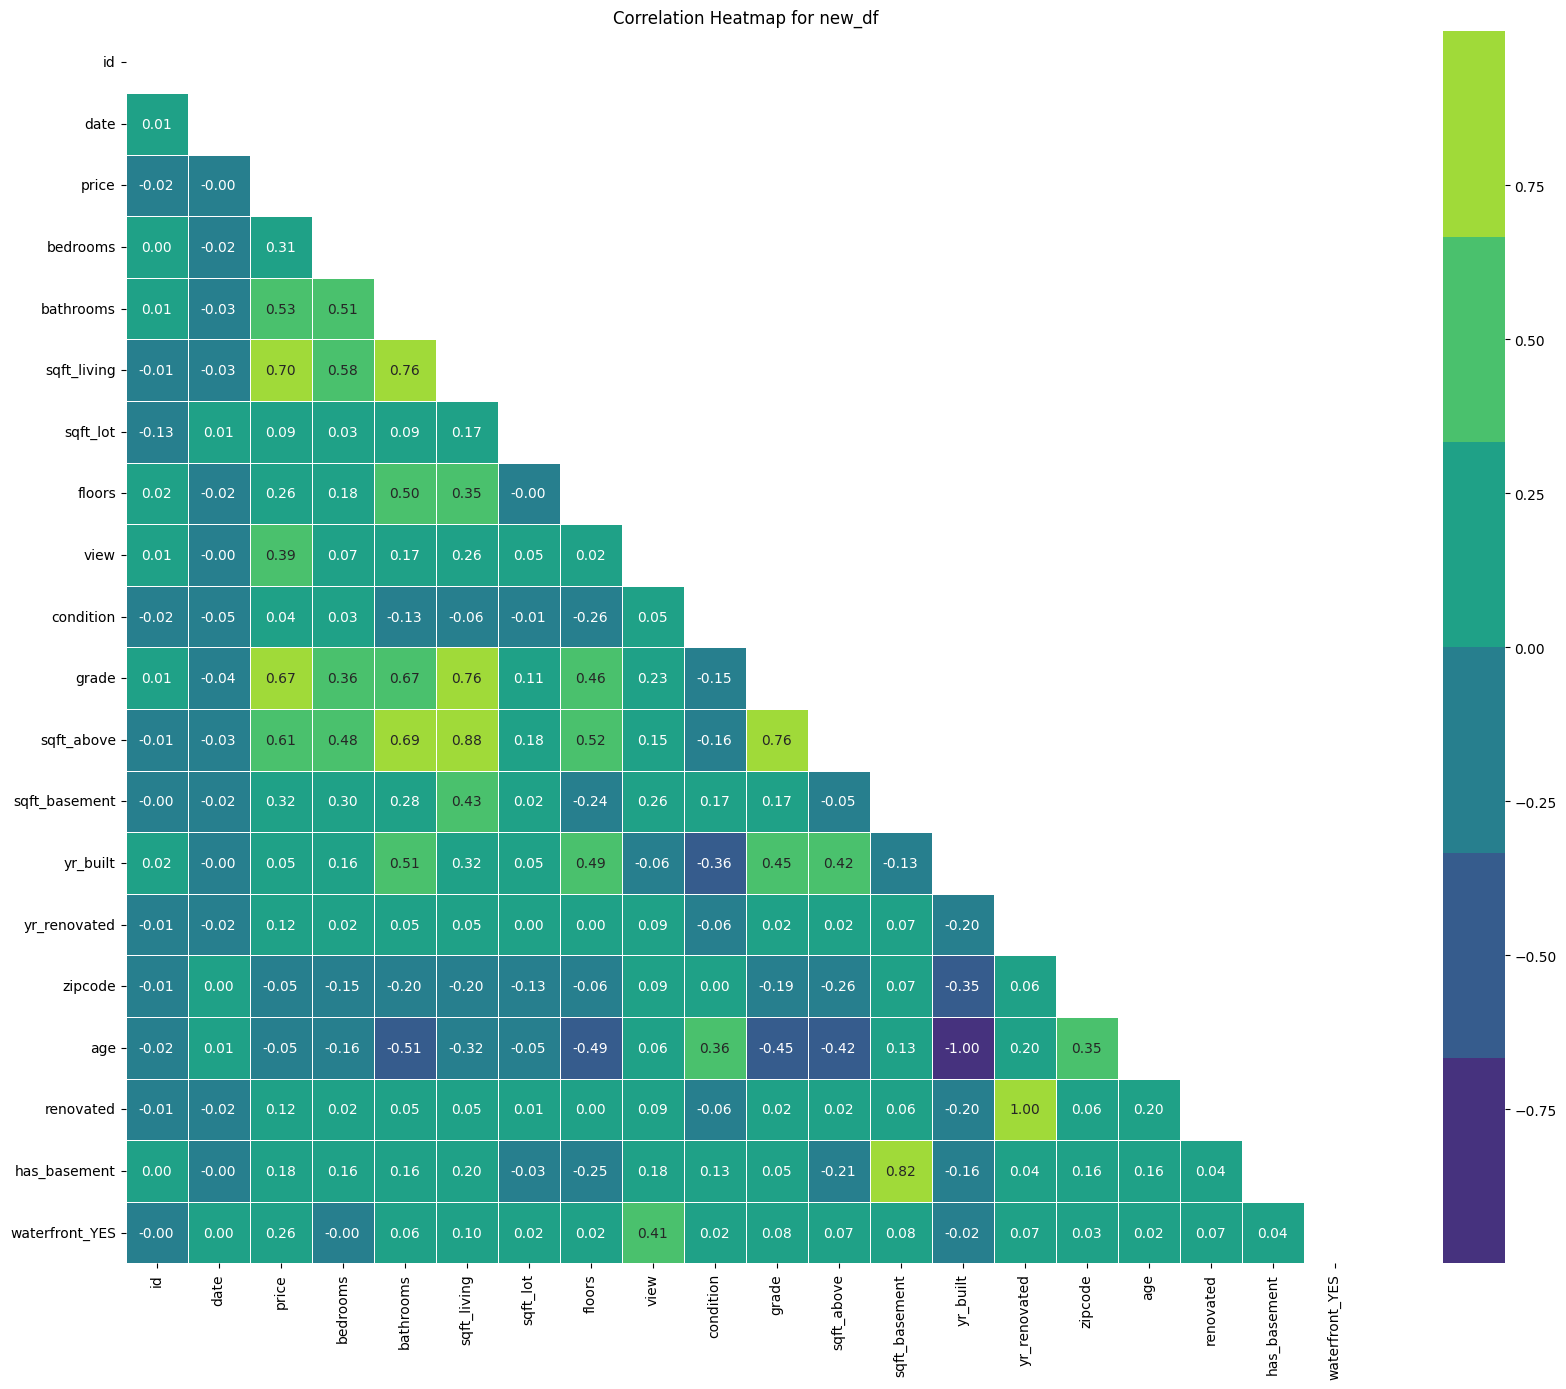

In [62]:
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set a color palette
cmap = sns.color_palette("viridis")

# Create the heatmap
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", mask=mask, linewidths=0.5)
plt.title('Correlation Heatmap for new_df')

plt.show()


In [58]:
# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
price_corr = new_df.corr()['price'].sort_values(ascending=False)

print(price_corr)


price             1.000000
sqft_living       0.701917
grade             0.667951
sqft_above        0.605368
bathrooms         0.525906
view              0.386430
sqft_basement     0.321108
bedrooms          0.308787
waterfront_YES    0.264306
floors            0.256804
has_basement      0.178264
yr_renovated      0.117855
renovated         0.117543
sqft_lot          0.089876
yr_built          0.053953
condition         0.036056
date             -0.003998
id               -0.016772
zipcode          -0.053402
age              -0.053890
Name: price, dtype: float64


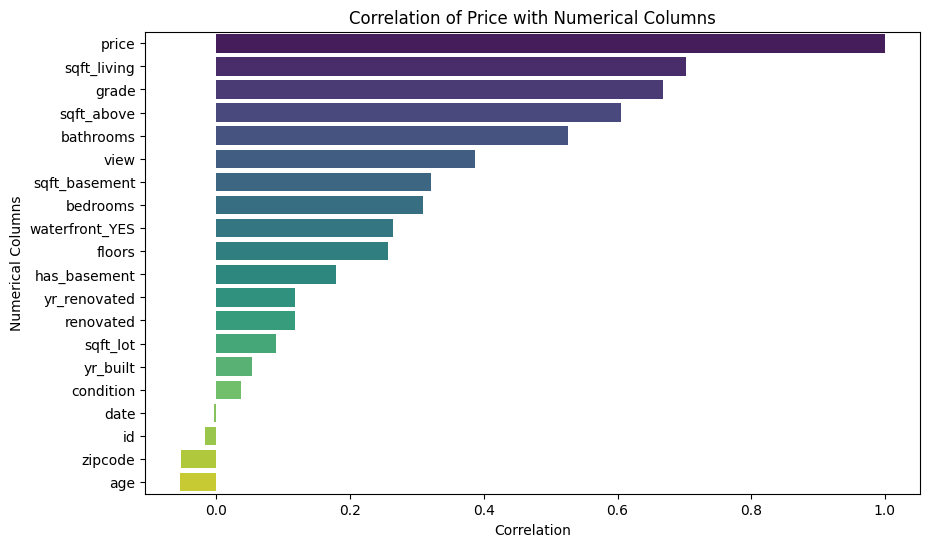

In [63]:

# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
price_corr = new_df.corr()['price'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=price_corr.values, y=price_corr.index, palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Numerical Columns')
plt.title('Correlation of Price with Numerical Columns')
plt.show()


### REGRESSION MODELLING
#### Creating the base model

#### From the figure above, it is clear that sqft_living has the highest correlation to the price of the house:

In [65]:
import statsmodels.api as sm

# Add a constant to the independent variable for the intercept
X = sm.add_constant(new_df['sqft_living'])

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(new_df['price'], X).fit()

# Get model summary
summary = model.summary()

# Extract R-squared and F-statistic from the summary
r_squared = model.rsquared
f_statistic = model.fvalue

print(summary)
# print(f"R-squared: {r_squared}")
# print(f"F-statistic: {f_statistic}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:04:24   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### At the moment the model can predict about 49.3% of the price of the houses.